In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [7]:
# Step 2: Load and Explore the Dataset
df = pd.read_csv('iris.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (150, 6)


In [8]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
print("\nTarget Variable Distribution:")
df.iloc[:, -1].value_counts()


Target Variable Distribution:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
print("\nBasic Statistics:")
df.describe()


Basic Statistics:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [13]:
# Step 3: Data Preparation

# Separate features (X) and target (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Ensures balanced split across all classes
)

print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

print("\nClass distribution in training set:")
print(y_train.value_counts().sort_index())

print("\nClass distribution in testing set:")
print(y_test.value_counts().sort_index())

Feature matrix shape: (150, 4)
Target vector shape: (150,)

Training set size: 120
Testing set size: 30

Class distribution in training set:
Species
Iris-setosa        40
Iris-versicolor    40
Iris-virginica     40
Name: count, dtype: int64

Class distribution in testing set:
Species
Iris-setosa        10
Iris-versicolor    10
Iris-virginica     10
Name: count, dtype: int64


In [15]:
# Step 4: Feature Normalization

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for better visualization
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Original feature ranges (training set):")
print(X_train.describe().round(2))

print("\nNormalized feature ranges (training set):")
print(X_train_scaled.describe().round(2))

print("\nFeature scaling verification:")
print("Mean of scaled features:", X_train_scaled.mean().round(4).values)
print("Std of scaled features:", X_train_scaled.std().round(4).values)

Original feature ranges (training set):
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count         120.00        120.00         120.00        120.00
mean            5.84          3.04           3.77          1.20
std             0.84          0.45           1.77          0.76
min             4.30          2.00           1.10          0.10
25%             5.10          2.80           1.60          0.30
50%             5.75          3.00           4.25          1.30
75%             6.40          3.30           5.10          1.80
max             7.90          4.40           6.90          2.50

Normalized feature ranges (training set):
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count         120.00        120.00         120.00        120.00
mean           -0.00          0.00          -0.00          0.00
std             1.00          1.00           1.00          1.00
min            -1.84         -2.35          -1.52         -1.45
25%            -0.89 

In [16]:
# Step 5: KNN Implementation with Different K Values

# Test different K values to find the optimal one
k_values = range(1, 21)  # Test K from 1 to 20
train_accuracies = []
test_accuracies = []

print("Testing different K values:\n")
print("K\tTrain Accuracy\tTest Accuracy")
print("-" * 35)

for k in k_values:
    # Create and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    
    # Calculate accuracies
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"{k}\t{train_acc:.4f}\t\t{test_acc:.4f}")

# Find the best K value based on test accuracy
best_k = k_values[np.argmax(test_accuracies)]
best_test_acc = max(test_accuracies)

print(f"\nBest K value: {best_k}")
print(f"Best Test Accuracy: {best_test_acc:.4f}")

Testing different K values:

K	Train Accuracy	Test Accuracy
-----------------------------------
1	1.0000		0.9667
2	0.9667		0.9333
3	0.9583		0.9333
4	0.9583		0.9333
5	0.9750		0.9333
6	0.9583		0.9333
7	0.9750		0.9667
8	0.9583		0.9333
9	0.9583		0.9667
10	0.9583		0.9667
11	0.9583		0.9667
12	0.9583		0.9667
13	0.9583		0.9667
14	0.9667		0.9333
15	0.9667		0.9667
16	0.9667		0.9667
17	0.9583		0.9667
18	0.9667		0.9667
19	0.9417		0.9667
20	0.9583		0.9667

Best K value: 1
Best Test Accuracy: 0.9667


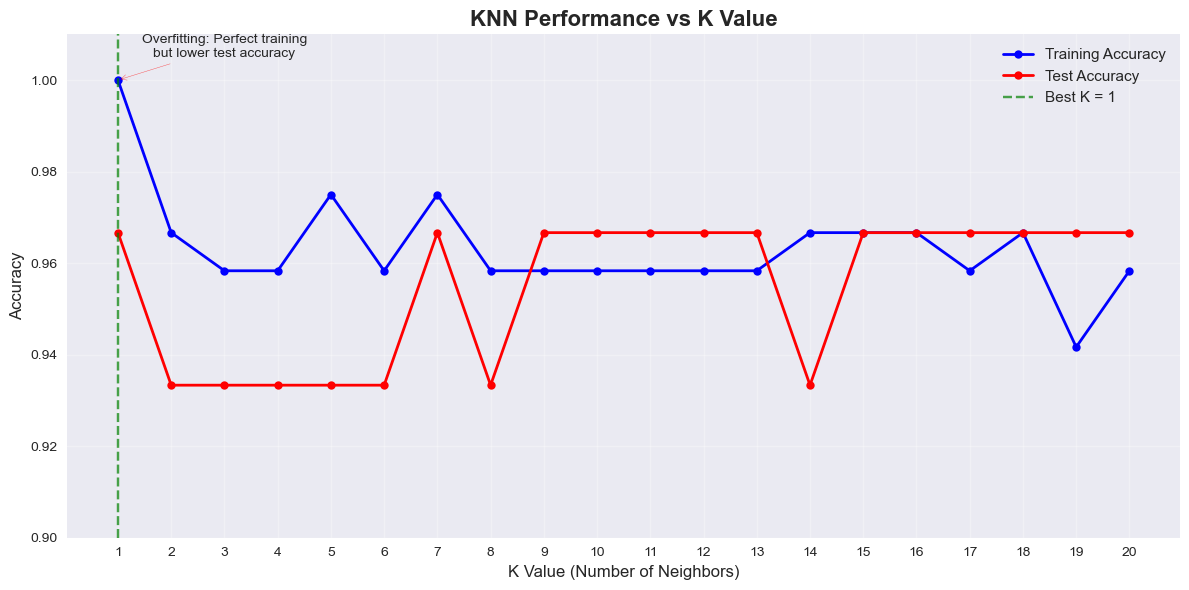

Key Insights:
• K=1 shows overfitting (train: 100%, test: 96.67%)
• Multiple K values achieve optimal test accuracy of 96.67%
• Sweet spot appears to be K=7,9,10,11,12,13,15,16,17,18,19,20
• For practical purposes, K=7 is a good choice (simpler model with same performance)


In [17]:
# Step 6: Visualize K Value Performance
plt.figure(figsize=(12, 6))

# Plot training and test accuracies
plt.plot(k_values, train_accuracies, 'bo-', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(k_values, test_accuracies, 'ro-', label='Test Accuracy', linewidth=2, markersize=6)

# Highlight the best K value
plt.axvline(x=best_k, color='green', linestyle='--', alpha=0.7, label=f'Best K = {best_k}')

# Customize the plot
plt.title('KNN Performance vs K Value', fontsize=16, fontweight='bold')
plt.xlabel('K Value (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 21))
plt.ylim(0.9, 1.01)

# Add annotations for key insights
plt.annotate('Overfitting: Perfect training\nbut lower test accuracy', 
             xy=(1, 1.0), xytext=(3, 1.005),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, ha='center')

plt.tight_layout()
plt.show()

# Summary of insights
print("Key Insights:")
print(f"• K=1 shows overfitting (train: 100%, test: 96.67%)")
print(f"• Multiple K values achieve optimal test accuracy of 96.67%")
print(f"• Sweet spot appears to be K=7,9,10,11,12,13,15,16,17,18,19,20")
print(f"• For practical purposes, K=7 is a good choice (simpler model with same performance)")

Final Model Performance (K=7):
Test Accuracy: 0.9667
Correctly classified: 29/30 samples

DETAILED CLASSIFICATION REPORT:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

CONFUSION MATRIX:


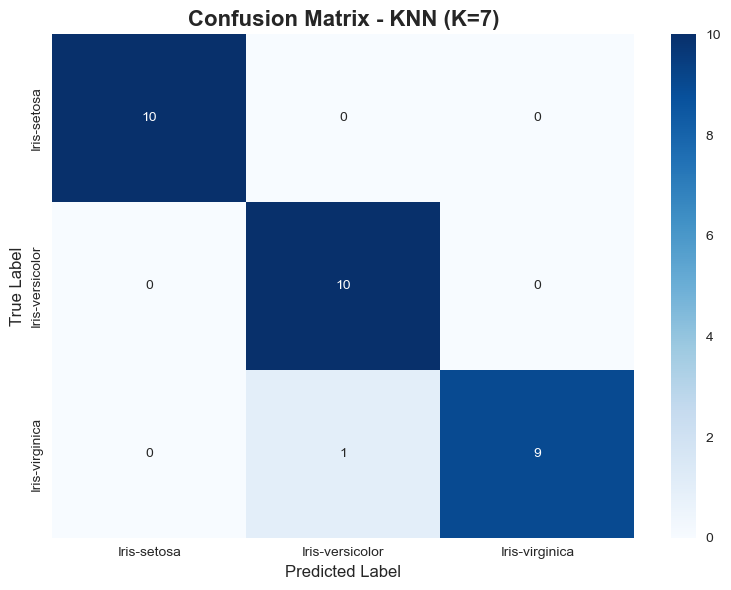


Misclassified Samples Analysis:
Number of misclassified samples: 1
Sample 19: True=Iris-virginica, Predicted=Iris-versicolor


In [24]:
# Step 7: Final Model with Detailed Evaluation

# Use K=7 for our final model (good balance of performance and simplicity)
final_k = 7
final_knn = KNeighborsClassifier(n_neighbors=final_k)
final_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_knn.predict(X_test_scaled)

# Calculate accuracy
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Performance (K={final_k}):")
print(f"Test Accuracy: {final_accuracy:.4f}")
print(f"Correctly classified: {np.sum(y_test == y_pred)}/{len(y_test)} samples")

print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT:")
print("="*50)
print(classification_report(y_test, y_pred))

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX:")
print("="*20)

# Create a beautiful confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
            yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title(f'Confusion Matrix - KNN (K={final_k})', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print misclassified samples for analysis
misclassified_mask = y_test != y_pred
misclassified_count = np.sum(misclassified_mask)

if misclassified_count > 0:
    print(f"\nMisclassified Samples Analysis:")
    print(f"Number of misclassified samples: {misclassified_count}")
    
    # Convert to numpy arrays for easier indexing
    y_test_array = y_test.values
    misclassified_indices = np.where(misclassified_mask)[0]
    
    for i, idx in enumerate(misclassified_indices):
        print(f"Sample {idx}: True={y_test_array[idx]}, Predicted={y_pred[idx]}")
else:
    print("\nPerfect Classification! No misclassified samples!")

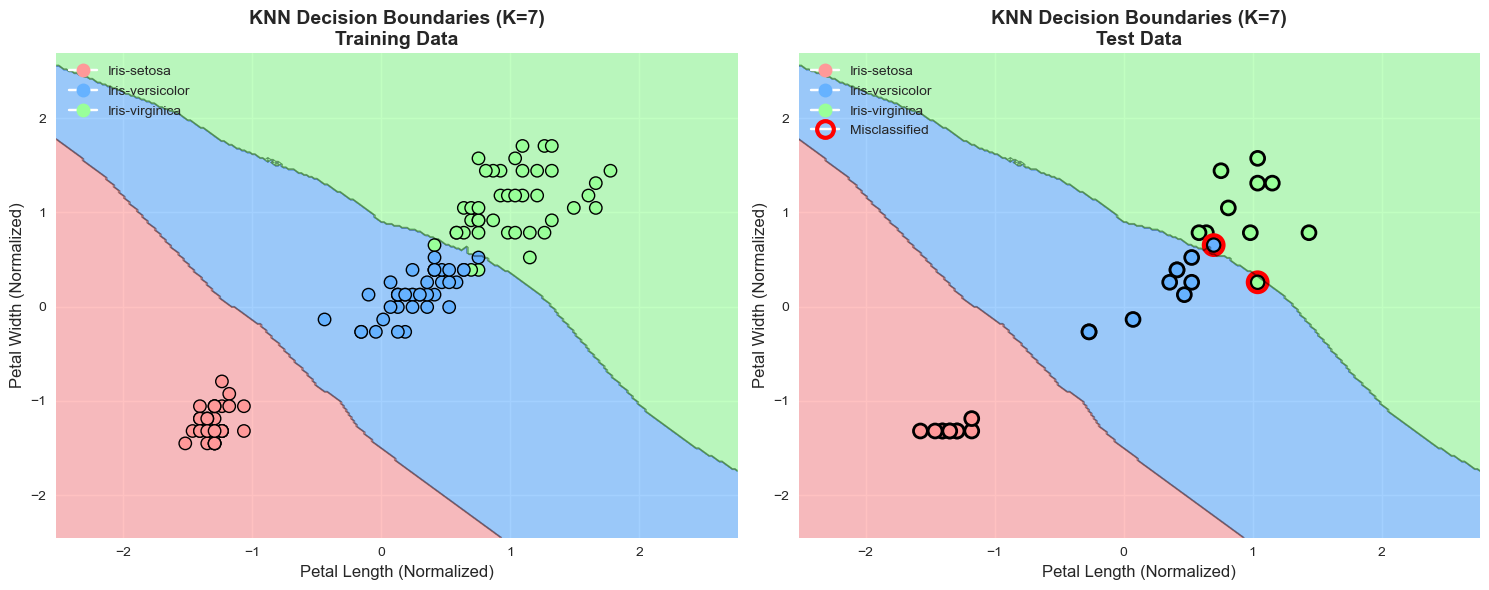

2D Model Accuracy (using only Petal features): 0.9333
Full 4D Model Accuracy: 0.9667

The petal features alone achieve 93.3% accuracy!
This shows that petal measurements are highly discriminative for iris classification.


In [25]:
# Step 8: Decision Boundary Visualization

# We'll visualize decision boundaries using the two most important features
# Let's use PetalLength and PetalWidth as they show the best class separation

# Create a subset with just the two most discriminative features
X_train_2d = X_train_scaled[['PetalLengthCm', 'PetalWidthCm']]
X_test_2d = X_test_scaled[['PetalLengthCm', 'PetalWidthCm']]

# Train KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=7)
knn_2d.fit(X_train_2d, y_train)

# Create a mesh for decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_train_2d.iloc[:, 0].min() - 1, X_train_2d.iloc[:, 0].max() + 1
y_min, y_max = X_train_2d.iloc[:, 1].min() - 1, X_train_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Create color map
from matplotlib.colors import ListedColormap
colors = ['#FF9999', '#66B2FF', '#99FF99']  # Light red, blue, green
cmap = ListedColormap(colors)

# Convert string labels to numbers for plotting
label_to_num = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
Z_num = np.array([label_to_num[label] for label in Z])
Z_num = Z_num.reshape(xx.shape)

y_train_num = np.array([label_to_num[label] for label in y_train])
y_test_num = np.array([label_to_num[label] for label in y_test])

# Create the plot
plt.figure(figsize=(15, 6))

# Plot 1: Decision Boundaries with Training Data
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_num, alpha=0.6, cmap=cmap)
plt.contour(xx, yy, Z_num, colors='black', alpha=0.3, linewidths=0.5)

# Plot training points
scatter = plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], 
                     c=y_train_num, cmap=cmap, s=80, edgecolors='black', linewidth=1)
plt.title('KNN Decision Boundaries (K=7)\nTraining Data', fontsize=14, fontweight='bold')
plt.xlabel('Petal Length (Normalized)', fontsize=12)
plt.ylabel('Petal Width (Normalized)', fontsize=12)

# Add legend
legend_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=colors[i], markersize=10, label=legend_labels[i]) 
                   for i in range(3)], loc='upper left')

# Plot 2: Decision Boundaries with Test Data
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_num, alpha=0.6, cmap=cmap)
plt.contour(xx, yy, Z_num, colors='black', alpha=0.3, linewidths=0.5)

# Plot test points
scatter = plt.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], 
                     c=y_test_num, cmap=cmap, s=100, edgecolors='black', linewidth=2)

# Highlight misclassified points
y_pred_2d = knn_2d.predict(X_test_2d)
y_pred_2d_num = np.array([label_to_num[label] for label in y_pred_2d])
misclassified_2d = y_test_num != y_pred_2d_num

if np.any(misclassified_2d):
    plt.scatter(X_test_2d.iloc[misclassified_2d, 0], X_test_2d.iloc[misclassified_2d, 1], 
                s=200, facecolors='none', edgecolors='red', linewidth=3, label='Misclassified')

plt.title('KNN Decision Boundaries (K=7)\nTest Data', fontsize=14, fontweight='bold')
plt.xlabel('Petal Length (Normalized)', fontsize=12)
plt.ylabel('Petal Width (Normalized)', fontsize=12)

# Add legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', 
                            markerfacecolor=colors[i], markersize=10, label=legend_labels[i]) 
                 for i in range(3)]
if np.any(misclassified_2d):
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', 
                                   markerfacecolor='none', markeredgecolor='red', 
                                   markersize=12, markeredgewidth=3, label='Misclassified'))
plt.legend(handles=legend_handles, loc='upper left')

plt.tight_layout()
plt.show()

# Print accuracy for 2D model
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"2D Model Accuracy (using only Petal features): {accuracy_2d:.4f}")
print(f"Full 4D Model Accuracy: {final_accuracy:.4f}")
print(f"\nThe petal features alone achieve {accuracy_2d:.1%} accuracy!")
print("This shows that petal measurements are highly discriminative for iris classification.")